In [22]:
import pymc3 as pm
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Image

import os, sys, re, datetime, time
from pathlib import Path

pj_dir = Path(os.getcwd()).parents[0]
data_dir = pj_dir/'data'
img_dir = pj_dir/'images'
src_dir = pj_dir/'src'
sys.path.append(str(src_dir))

from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns
plt.style.use("bmh")
import numpy as np
import pandas as pd
import dask.dataframe as dd

from tqdm import tqdm_notebook
from dotenv import load_dotenv

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 4)
plt.rcParams["font.family"] = "IPAexGothic"
import logging
logging.basicConfig(level=logging.INFO)

In [20]:
with pm.Model() as model:
    lambda_ = pm.Exponential("poisson_param", 1)
    data_gen = pm.Poisson("data_gen", lambda_)
    data_plus_1 = data_gen + 1
    print(lambda_.tag.test_value, data_gen.tag.test_value, data_plus_1.tag.test_value)

0.6931471824645996 0 1


In [23]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1.)
    lambda_2 = pm.Exponential("lambda_2", 1.)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

In [24]:
samples = lambda_1.random(size=20000)

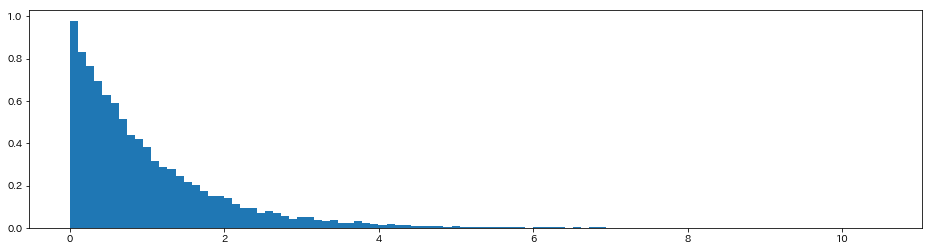

In [30]:
plt.hist(samples, bins=100, density=True);

In [32]:
model = pm.Model()

In [34]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson("fixed", 1, observed=data)

In [35]:
fixed_variable.tag.test_value

array([10,  5])